<a href="https://colab.research.google.com/github/nraoamuktha/Academic_projects/blob/main/Financial%20information%20systems/Assignment4/Section0502_Group08_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1:**
The question states us the below:
1. Download price data for AAPL, GOOG and SPY for the period 12-31-2014 through 12-31-2015 (both dates inclusive)
2. Filter out all columns except for the ‘Close’ price.
3. Join all the prices into a single dataFrame with columns named appropriately.

In [1]:
# Import all the neccessary libraries
%matplotlib inline
import matplotlib as mpl
# Import pyplot as plt
import matplotlib.pyplot as pt
import pandas as pd
import numpy as np


The data for AAPL, GOOG, SPY for the period  12-31-2014 through 12-31-2015 (both dates inclusive) has been downloaded from Yahoo Finance for our analysis.

Let's now read the data for the AAPL, GOOG, SPY Stocks utilizing the ***read_price_data()*** function defined from our previous assignments.

**Objective of the function *read_price_data*:**

To read price data from the CSV file and perform data analytics
We have defined a function called 'read_price_data' that will perfom certain tasks to analyze each dataset. The function will read the CSV file and load it to a new dataframe 'stock_hist' and perform some statistical analysis as well as showcase the data for further analysis on our end.

The function is reusable, Parameters used in the function:

    filename: The CSV file to read.
    index_col: The column to use as the index (default is 0).
    parse_dates: Whether to parse dates as datetime objects (default is True).

In [2]:
# Define a function to read price data
def read_price_data(filename, index_col=0, parse_dates=True):
    '''
    This function is used to read the data files and display the summary statistics

    Parameters:
    filename: The CSV file to read.
    index_col: The column to use as the index (default is 0).
    parse_dates: Whether to parse dates as datetime objects (default is True).
    '''
    # Load the csv file into a new dataframe
    stock_hist = pd.read_csv(filename, index_col=index_col ,parse_dates=parse_dates)

    # Verify dataframe information
    print('Stock Information:\n')
    print(f'{stock_hist.info()}\n')

    # Check the existence of null values
    print('NULL values check:\n')
    print(f'{stock_hist.isnull().sum()}\n')

    # Print the summary statistics
    print('Summary statistics:\n')
    print(f'{stock_hist.describe()}\n')

    # Verify the start dates
    print('Check the first few rows:\n')
    print(f'{stock_hist.head()}\n')

    # Verify the end dates
    print('Check the last few rows:\n')
    print(f'{stock_hist.tail()}\n')

    return stock_hist

Defining the plot_and_format_y_axis to be utilised later for our analysis.

**Objective of *plot_and_format_y_axis*:**

The function is used for plotting charts. The function calls the python's plot method() within the function.

In [3]:
# Defining function to plot the desired charts
def plot_and_format_y_axis(data_frame, formatter= mpl.ticker.ScalarFormatter(),
                           aspect_ratio=(12,8), title='', ylabel='', grid = True, label = ''):

    '''
    This function is used to display the plots/charts.

    Parameters:
    data_frame: The dataframe required to display the chart.
    formatter: Used to define the format of values displayed on the chart.
    aspect_ratio: The aspect ratio of the chart, defaulted to (12,8).
    title: The Title for the plot or chart.
    ylabel: The y label for the plot or chart.
    grid: Specifies if the plot requires grid.
    label: Defines the label in the plot/chart.
    '''

    pt.figure(figsize=aspect_ratio)
    pt.plot(data_frame, label=label)

    pt.title(title)
    pt.xlabel('Date')
    pt.ylabel(ylabel)
    if grid:
        pt.grid(grid)
    pt.legend()
    if formatter: #formater used to format y axis
        pt.gca().yaxis.set_major_formatter(formatter)
    #display the plot
    pt.show()

Defining the print_pct_data to be utilised later in our analysis.

**Objective of *print_pct_data*:**

The function print_pct_data is utilised to print the data in the table to percentages. We have also used this function especially to perfom index slicing and pick specific coloumns to be formated in percentages.

In [4]:
# Leveraged ChatGPT for this function
# Function to pretty print the data as percentages into a table.

def print_pct_data(data_frame, format_specifier='{:.4%}', na_rep='NaN', index_slice=None):
    '''
    This function is used to pretty print the data into a table with % format.

    Parameters:
    data_frame: The dataframe consisting the data intended for pretty-print.
    format_specifier: Specify the format required for pretty-printing.
    na_rep: Specify the alternative for null values.
    index_slice: Specify a subset of the DataFrame for formatting (using pandas.IndexSlice).
    '''
    pretty_print_df = data_frame.copy()  # Create a copy to avoid modifying the original DataFrame.

     # Apply formatting only to the specified subset using the provided index_slice

    if index_slice is not None:
        pretty_print_df.loc[index_slice] = pretty_print_df.loc[index_slice].applymap(
            lambda x: format_specifier.format(x) if not pd.isna(x) else na_rep
        )

        # Apply styling to center-align the text and add a border
    pretty_print_df.style.set_properties(**{'text-align': 'center'})\
        .set_table_styles([{'selector': 'td', 'props': [('border', '1px solid black')]}])

    return pretty_print_df

By using the function ***read_price_data*** we read the **AAPL, GOOG & SPY** stock price history data from the CSV file. Extract the Close column from the dataset.

In [5]:
# Read the stock price history file of AAPL
AAPL_df = read_price_data('AAPL.csv')

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-12-31 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean    30.036670   30.303113   29.707223   30.000455   27.124416   
std      1.921666    1.867068    1.980098    1.923075    1.686932   
min     23.717501   26.757500   23.000000   25.780001   23.

In [6]:
# Read the stock price history file of GOOG
GOOG_df = read_price_data('GOOG.csv')

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-12-31 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean    30.088585   30.357059   29.790354   30.085057   30.085057   
std      4.082126    4.133094    4.026198    4.085357    4.085357   
min     24.664783   24.730902   24.311253   24.560070   24.

In [7]:
# Read the stock price history file of SPY
SPY_df = read_price_data('SPY.csv')

Stock Information:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-12-31 to 2015-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None

NULL values check:

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Summary statistics:

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   206.201384  207.230356  205.030909  206.184625  177.538587   
std      5.443118    5.099638    5.846787    5.495650    4.569714   
min    187.490005  189.740005  182.399994  187.270004  161.

As a second step, let's filter out the columns except for the 'Close' Price.

In [8]:
# Extract only the Close column from the dataframe
AAPL_df = pd.DataFrame(AAPL_df['Close'])

#Renaming the close column to AAPL
AAPL_df.columns = ['AAPL']

## Display the first five columns..
AAPL_df.head()

,AAPL
Date,
2014-12-31,27.594999
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500


In [9]:
# Extract only the Close column from the dataframe
GOOG_df = pd.DataFrame(GOOG_df['Close'])

#Renaming the close column to GOOG
GOOG_df.columns = ['GOOG']

## Display the first five columns..
GOOG_df.head()

,GOOG
Date,
2014-12-31,26.247936
2015-01-02,26.168653
2015-01-05,25.623152
2015-01-06,25.029282
2015-01-07,24.986401


In [10]:
# Extract only the Close column from the dataframe
SPY_df = pd.DataFrame(SPY_df['Close'])

#Renaming the close column to SPY
SPY_df.columns = ['SPY']

## Display the first five columns..
SPY_df.head()

,SPY
Date,
2014-12-31,205.539993
2015-01-02,205.429993
2015-01-05,201.720001
2015-01-06,199.820007
2015-01-07,202.309998


Let us now merge the all the close prices into a single dataframe named allPrices.

We used a join operator to perform an "inner" join where the join takes only the intersection of dates.

In [11]:
# next, we will do an "inner" join of AAPL, GOOG and SPY
# an "inner" join takes an intersection of the dates,
# where it preserves only those rows whose index exists in both dataframes.
allPrices = AAPL_df.join([GOOG_df, SPY_df], how ='inner')

In [12]:
allPrices.head()

,AAPL,GOOG,SPY
Date,,,
2014-12-31,27.594999,26.247936,205.539993
2015-01-02,27.332500,26.168653,205.429993
2015-01-05,26.562500,25.623152,201.720001
2015-01-06,26.565001,25.029282,199.820007
2015-01-07,26.937500,24.986401,202.309998


From the above steps, we obtained the close prices of diversified portfolio with the stocks of AAPL, GOOG and SPY from 12-31-2014 through 12-31-2015(inclusive).

Lets plot the close prices for the diversified portfolio containing AAPL, GOOG, SPY using the function ***plot_and_format_y_axis*** defined in the beginning to understand better and perform our analysis.

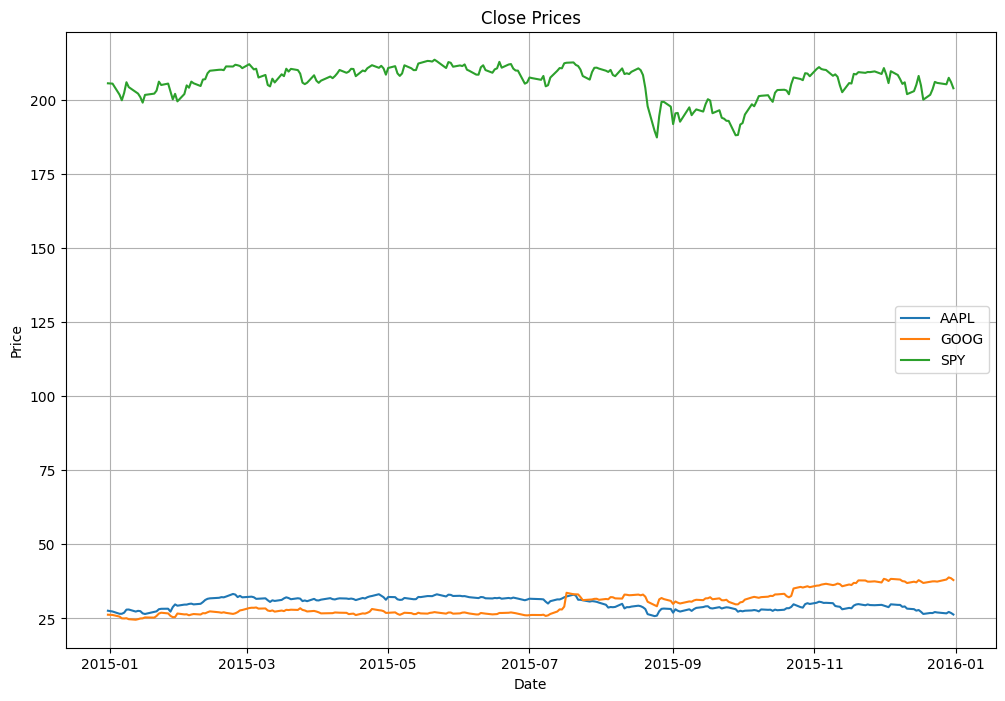

In [13]:
# Plot Close prices for the diversified portfolio
allprice_label = ['AAPL', 'GOOG', 'SPY']
plot_and_format_y_axis(allPrices, title='Close Prices', ylabel='Price', label = allprice_label)

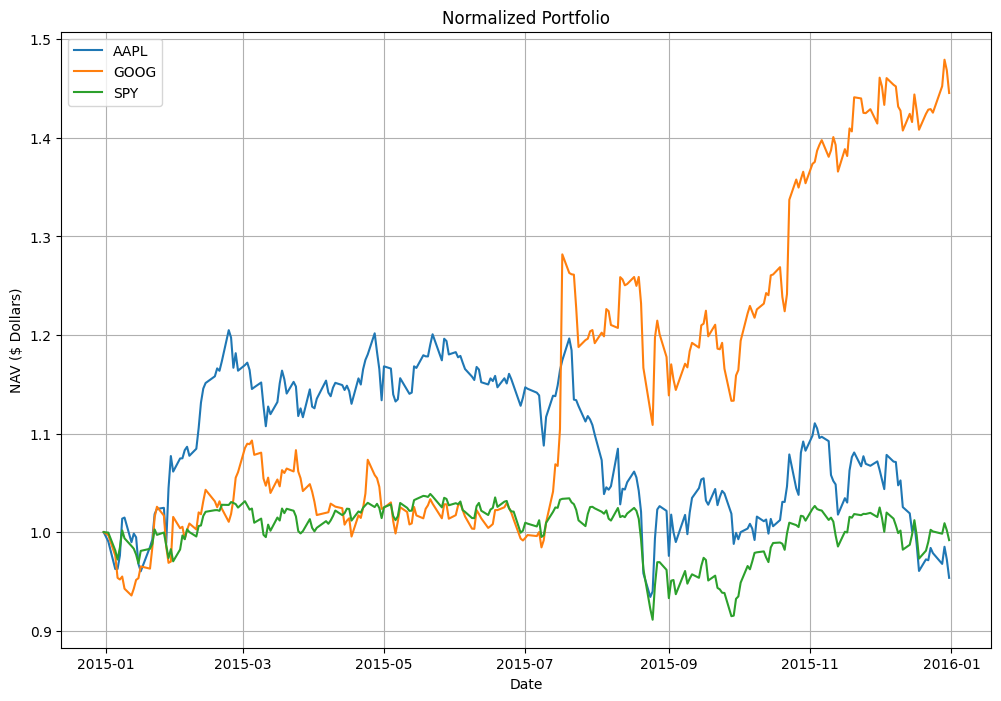

In [14]:
# Plot normalized prices (or "NAVs") just to analyse the relative performances
plot_and_format_y_axis((allPrices / allPrices.iloc[0]), title='Normalized Portfolio', ylabel='NAV ($ Dollars)', label = allprice_label)

From the above normalised Portfolio plot, it can be observed that though the close prices of SPY looked high performing, the stock of GOOG has a linear upward trend, it outperformed both AAPL and SPY.

# **Question 2:**
We calculate the simple returns(ie difference in prices between the current and previous day) for all three portfolios, create a cumulated NAV which is to cumulate the simple returns.
A new weightedNAV dataframe is created which starts out with 50% AAPL, 30% GOOG and 20% SPY (the % should total to 100) and undergoes no further re-balancing.
We create another new dataFrame called weightedPortfolio whose first 3 columns are these weighted NAV’s of the 3 stocks and whose 4th column titled Total(Our diversified portfolio) is the sum of the individual columns and now represents the cumulated NAV of your new weighted portfolio. Finally we calculate the gross return (returns before performing any removal of taxes etc) and net return (returns after removing taxes, other payments) of this new Total portfolio as of 12-31-2015.

In [15]:
# Defining the initial investment and weights
#investment = 100000
init_weights = np.array([0.5, 0.2, 0.3])
#init_investment_amounts = init_weights * investment

# Calculating the simple returns of all three stocks (AAPL, GOOG, SPY).
simple_returns = allPrices.pct_change()

# Calculating cumulative simple returns, while filling NaN values with '0'
cum_simple_returns = simple_returns.cumsum().fillna(0)

# Creating a cumulated NAV dataframe
cumulated_nav_simple_returns = (simple_returns + 1).cumprod().fillna(1)

# Create a new weighted NAV dataFrame called weightedNAV which starts out with 50% AAPL, 30% GOOG and 20% SPY
weightedNAV = init_weights * cumulated_nav_simple_returns

# Creating a weightedPortfolio, where first 3 columns are these weighted NAV’s and 4th column titled Total is the sum of the individual columns
weightedPortfolio = weightedNAV.copy()
weightedPortfolio['Total'] = weightedPortfolio.sum(axis=1)

# Initial Investment Value
initial_investment = weightedPortfolio.iloc[0,:].sum()
print(f'The initial investment for the weighted portfolio: {initial_investment}')

# Calculating the Gross Return of the weightedPortfolio as of 12-31-2015.
gross_return = weightedPortfolio.iloc[-1,:].sum() - initial_investment
print(f'The gross returns for the weighted portfolio: {gross_return}')

# Calculating the Net Return of the weightedPortfolio as of 12-31-2015.
net_return = weightedPortfolio.iloc[-1,:].sum() / weightedPortfolio.iloc[0,:].sum() - 1
print(f'The Net returns for the weighted portfolio: {net_return} \nThe Net return in percentage(%) is {net_return*100:.4}%')

The initial investment for the weighted portfolio: 2.0
The gross returns for the weighted portfolio: 0.126979650124583
The Net returns for the weighted portfolio: 0.0634898250622915 
The Net return in percentage(%) is 6.349%


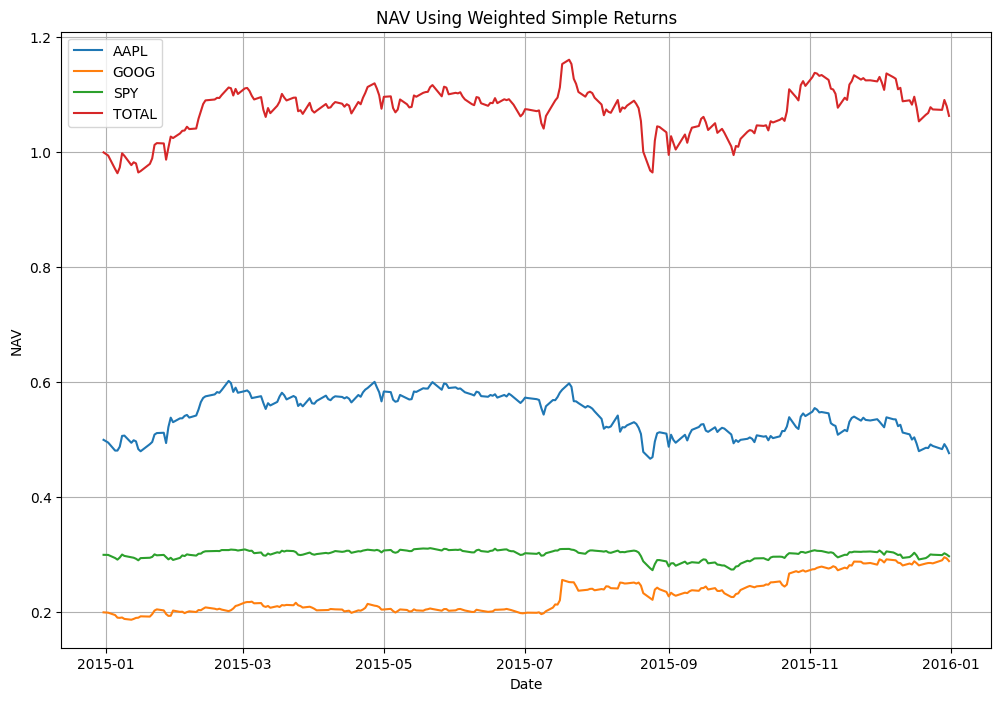

In [16]:
# Plotting the NAV Using Weighted Simple Returns
label_data = ['AAPL', 'GOOG', 'SPY', 'TOTAL']

plot_and_format_y_axis(weightedPortfolio, title='NAV Using Weighted Simple Returns', ylabel='NAV', label = label_data)

# **Question 3:**
[Extra Credit: 2 points]
1. Write a function, calcSummaryStatistics, which takes a

*   dataFrame of returns (can be either simple returns or logarithmic returns) as its input parameter.
*   three optional parameters:
1. annualization_factor (default: 260),
2. print_Screen flag (default: True)
3. percent_format_string string specification to print percentage numbers (default: 2 decimal places).

It then calculates the summary statistics of all the input return streams in the input dataFrame and, if printScreen is True, prints it out in the appropriate formats, using the pretty printing function print_pct_data that you wrote in HW 2 and enhanced in HW 3 to handle pretty-printing a subset of the input dataFrame.

Note 1: To calculate the drawdown, simply add the returns like we did in class. No need to take the exponent.

Note 2: For simplicity, you can assume that the input of returns has a first row of NaNs. Therefore you should be sure to pass in a returns dataFrame that has a first row of NaNs whenever you call this function. This assumption will allow you to use .dropna()from the returns (if necessary) and .fillna(0) on the NAV lines.

Note 3: However, if you want to challenge yourself, then you can implement errorchecking on the input dataFrame as follows: (a) if it does not have a first NaN row, then insert one at the top (taking care to ensure a proper (t-1) business date for that row, and (b) if it does have a first NaN row, but not all columns are NaN, OR it has a NaN row that is not the first row, then raise a ValueError.

Note 4: You will use this function (especially its option to not print to screen) in subsequent homeworks as well as the project, so I would urge you to write this now (and get your extra credit points at the same time!)

In [17]:
# Creating a dataframe
impliedDailyWeightsFromReturns = weightedNAV.div(weightedNAV.sum(axis=1), axis=0)

# Lag them by one day so we can then multiply YESTERDAY's weights with TODAY'S returns
impliedDailyWeightsFromReturns_lag = impliedDailyWeightsFromReturns.shift(1)

# Create a matrix of the portfolios
return_matrix = impliedDailyWeightsFromReturns.shift(1).multiply(simple_returns)

dailyWeightedReturn = return_matrix.sum(axis=1, skipna=False)

# Combines the simple portfolio to the diversified portfolio returns
allReturnsForComparison = simple_returns.join(pd.DataFrame(dailyWeightedReturn, columns=['Total']))

allReturnsForComparison

,AAPL,GOOG,SPY,Total
Date,,,,
2014-12-31,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.003021,-0.000535,-0.005521
2015-01-05,-0.028172,-0.020846,-0.018060,-0.023654
2015-01-06,0.000094,-0.023177,-0.009419,-0.007470
2015-01-07,0.014022,-0.001713,0.012461,0.010436
...,...,...,...,...
2015-12-24,-0.005340,-0.002546,-0.001650,-0.003571
2015-12-28,-0.011201,0.018854,-0.002285,-0.000736
2015-12-29,0.017974,0.018478,0.010672,0.016074


In [18]:
# The function calculates the summary statistics(return, risk, Sharpe... etc.) of all the input return streams
# Leveraged ChatGPT
def calcSummaryStatistics(returns_df, annualization_factor = 260, print_Screen = True, percent_format_string = '{:.2}%'):
  '''
  This function calculates the summary statistics(return, risk, Sharpe... etc.) of all the input return streams.

  Parameters:
  returns_df: dataFrame of returns (can be either simple returns or logarithmic returns) as its input parameter
  annualization_factor: annualisation factor
  print_Screen: flag indicating the desired printing (default: True)
  percent_format_string: string specification to print percentage numbers (default: 2 decimal places).
  '''
  if not returns_df.isnull().any(axis=1).any():
      # If there are NaN rows, raise a ValueError
      raise ValueError("Input DataFrame contains NaN values in non-conforming positions.")
  else:
      # Insert a NaN row at the top with a proper (t-1) business date
      first_date = returns_df.index[0]
      previous_date = first_date - pd.tseries.offsets.BDay(1)
      first_row = pd.Series([np.nan] * returns_df.shape[1], index=returns_df.columns, name=previous_date)
      returns_df = pd.concat([first_row, returns_df])

  # Summary Statistics
  summary_stats = pd.DataFrame([annualization_factor*returns_df.mean(),
                              np.sqrt(annualization_factor)*returns_df.std(),
                             returns_df.mean() / returns_df.std() * np.sqrt(annualization_factor),
                              ((returns_df+1).cumprod().fillna(1) - np.maximum.accumulate((returns_df+1).cumprod().fillna(1))).min(axis=0),
                              (returns_df >= 0).sum() / (returns_df.shape[0] - 1)],
                             index=['Average Annual Return', 'Annual Risk', 'Sharpe Ratio', 'maxDD', 'Success Ratio'])

  # Pretty print the summary statistics if print_Screen is True
  if print_Screen:
      print_pct_data(summary_stats, format_specifier=percent_format_string)

  return summary_stats

In [19]:
calcSummaryStatistics(allReturnsForComparison)

,0,AAPL,GOOG,SPY,Total
Average Annual Return,NaN,-0.012261,0.423687,0.004071,0.084747
Annual Risk,NaN,0.271550,0.299683,0.158204,0.206609
Sharpe Ratio,NaN,-0.045152,1.413784,0.025734,0.410183
maxDD,0.0,-0.270701,-0.173099,-0.127615,-0.196130
Success Ratio,0.0,0.468750,0.492188,0.472656,0.488281


# **Question 4:**
Calculate the daily simple returns of the weightedPortfolio that you created in #2.

Are the daily returns of the first 3 columns (the individual stocks) identical to the daily simple returns you calculated from the original stock prices?

Why or why not?

Now calculate and print the summary statistics of all 4 simple return columns that you just calculated. (If you wrote the extra credit function in Question # 3 above, use it).

In [20]:
# Calculating daily simple returns of the weightedPortfolio
simple_returns_weightedPortfolio = weightedPortfolio.pct_change()
print_pct_data(simple_returns_weightedPortfolio[['AAPL', 'GOOG', 'SPY']])

,AAPL,GOOG,SPY
Date,,,
2014-12-31,NaN,NaN,NaN
2015-01-02,-0.009513,-0.003021,-0.000535
2015-01-05,-0.028172,-0.020846,-0.018060
2015-01-06,0.000094,-0.023177,-0.009419
2015-01-07,0.014022,-0.001713,0.012461
...,...,...,...
2015-12-24,-0.005340,-0.002546,-0.001650
2015-12-28,-0.011201,0.018854,-0.002285
2015-12-29,0.017974,0.018478,0.010672


In [21]:
print_pct_data(simple_returns)

,AAPL,GOOG,SPY
Date,,,
2014-12-31,NaN,NaN,NaN
2015-01-02,-0.009513,-0.003021,-0.000535
2015-01-05,-0.028172,-0.020846,-0.018060
2015-01-06,0.000094,-0.023177,-0.009419
2015-01-07,0.014022,-0.001713,0.012461
...,...,...,...
2015-12-24,-0.005340,-0.002546,-0.001650
2015-12-28,-0.011201,0.018854,-0.002285
2015-12-29,0.017974,0.018478,0.010672


In [22]:
calcSummaryStatistics(simple_returns_weightedPortfolio)

,0,AAPL,GOOG,SPY,Total
Average Annual Return,NaN,-0.012261,0.423687,0.004071,0.084747
Annual Risk,NaN,0.271550,0.299683,0.158204,0.206609
Sharpe Ratio,NaN,-0.045152,1.413784,0.025734,0.410183
maxDD,0.0,-0.270701,-0.173099,-0.127615,-0.196130
Success Ratio,0.0,0.468750,0.492188,0.472656,0.488281


**Question 5:** [2 points] Now create a portfolio that starts off on 1/2/2015 with a 50%-30%-20% mix as before, but then gets rebalanced quarterly, i.e., at the end of March 2015, June 2015, Sep 2015 and Dec 2015. Calculate the gross and net return of this portfolio as of 12/31/2015.

In [23]:
Prices = allPrices['2015-01-02':]
# Defining the initial investment and weights
#investment = 100000
init_weights_01022015 = np.array([0.5, 0.2, 0.3])
#init_investment_amounts = init_weights * investment

# Calculating the simple returns of all three stocks (AAPL, GOOG, SPY).
simple_returns_01022015 = Prices.pct_change()

# Calculating cumulative simple returns, while filling NaN values with '0'
cum_simple_returns_01022015 = simple_returns_01022015.cumsum().fillna(0)

# Creating a cumulated NAV dataframe
cumulated_nav_simple_returns_01022015 = (simple_returns_01022015 + 1).cumprod().fillna(1)

# Create a new weighted NAV dataFrame called weightedNAV which starts out with 50% AAPL, 30% GOOG and 20% SPY
weightedNAV_01022015 = init_weights_01022015 * cumulated_nav_simple_returns_01022015

# Creating a weightedPortfolio, where first 3 columns are these weighted NAV’s and 4th column titled Total is the sum of the individual columns
weightedPortfolio_01022015 = weightedNAV_01022015.copy()
weightedPortfolio_01022015['Total'] = weightedPortfolio_01022015.sum(axis=1)

In [24]:
weightedPortfolio_01022015

,AAPL,GOOG,SPY,Total
Date,,,,
2015-01-02,0.500000,0.200000,0.300000,1.000000
2015-01-05,0.485914,0.195831,0.294582,0.976327
2015-01-06,0.485960,0.191292,0.291807,0.969059
2015-01-07,0.492774,0.190964,0.295444,0.979182
2015-01-08,0.511708,0.191566,0.300686,1.003961
...,...,...,...,...
2015-12-24,0.494055,0.285991,0.300365,1.080411
2015-12-28,0.488521,0.291383,0.299679,1.079583
2015-12-29,0.497302,0.296767,0.302877,1.096946


In [25]:
# initialize to the no-rebalancing case
EodNavForQuarterlyRebal_01022015 = weightedNAV_01022015.copy()

# list of month-end dates, EXCEPT for the very first date 12/31/2014
quarterly_dates = pd.date_range(start = EodNavForQuarterlyRebal_01022015.index[1], end = EodNavForQuarterlyRebal_01022015.index[-1], freq='BM')
desired_dates = quarterly_dates[quarterly_dates.month.isin([3, 6, 9, 12])]

In [26]:
desired_dates

DatetimeIndex(['2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31'], dtype='datetime64[ns]', freq=None)

In [27]:
for i in range(1,EodNavForQuarterlyRebal_01022015.shape[0]): # start from 1/2/2015 and not 12/31/2014
    # every day, make that day's NAV equal to yesterday's NAV times today's return
    # (the reason we need to update this calculation is because of the re-balance that happens at month-end)
    EodNavForQuarterlyRebal_01022015.iloc[i,:] = EodNavForQuarterlyRebal_01022015.iloc[i-1, :] * (1 + simple_returns_01022015.iloc[i, :])
    # and then, ONLY on month-end, rebalance the NAV to the original weights times last night's NAV
    if EodNavForQuarterlyRebal_01022015.index[i] in desired_dates:
        # re-balance back to the initial weights
        EodNavForQuarterlyRebal_01022015.iloc[i,:] = init_weights * EodNavForQuarterlyRebal_01022015.iloc[i, :].sum(axis=0)

In [28]:
EodNavForQuarterlyRebal_01022015.style

,AAPL,GOOG,SPY
Date,,,
2015-01-02 00:00:00,0.500000,0.200000,0.300000
2015-01-05 00:00:00,0.485914,0.195831,0.294582
2015-01-06 00:00:00,0.485960,0.191292,0.291807
2015-01-07 00:00:00,0.492774,0.190964,0.295444
2015-01-08 00:00:00,0.511708,0.191566,0.300686
2015-01-09 00:00:00,0.512256,0.189086,0.298277
2015-01-12 00:00:00,0.499634,0.187706,0.295940
2015-01-13 00:00:00,0.504070,0.189089,0.295108
2015-01-14 00:00:00,0.502149,0.190877,0.293326


In [29]:
# Calculating the return
EodNavForQuarterlyRebal_01022015.iloc[-1,:]

AAPL    0.534303
GOOG    0.213721
SPY     0.320582
Name: 2015-12-31 00:00:00, dtype: float64

##### we can once again calculate the daily implied weights. They should drift until month-end, when they shoud reset to the original weights

In [30]:
impliedDailyWeightsFromMonthlyRebalancedReturns = EodNavForQuarterlyRebal_01022015.div(EodNavForQuarterlyRebal_01022015.sum(axis=1), axis=0)

In [31]:
impliedDailyWeightsFromMonthlyRebalancedReturns

,AAPL,GOOG,SPY
Date,,,
2015-01-02,0.500000,0.200000,0.300000
2015-01-05,0.497696,0.200579,0.301725
2015-01-06,0.501476,0.197400,0.301124
2015-01-07,0.503251,0.195024,0.301725
2015-01-08,0.509689,0.190811,0.299500
...,...,...,...
2015-12-24,0.462986,0.232589,0.304424
2015-12-28,0.458487,0.237330,0.304184
2015-12-29,0.459435,0.237938,0.302626


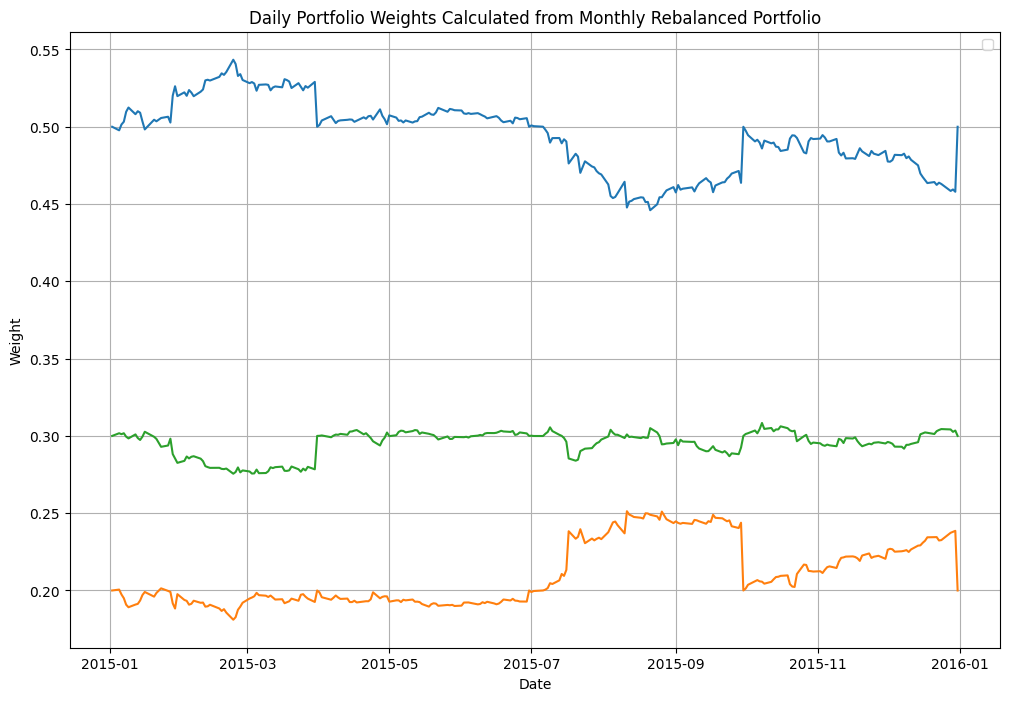

In [32]:
plot_and_format_y_axis(impliedDailyWeightsFromMonthlyRebalancedReturns, title='Daily Portfolio Weights Calculated from Monthly Rebalanced Portfolio', ylabel='Weight')

**Question 6:** [2 points] Next create a portfolio that starts off with a 50%-30%-20% mix as before, but which gets rebalanced daily. Use the for-loop as in class. Calculate the gross and net return of this portfolio as of 12/31/2015.

In [33]:
# initialize to the no-rebalancing case
EodNavForDailyRebal_01022015 = weightedNAV_01022015.copy()

# ... and then simply rebalance EVERY DAY. No need to check for month-end
for i in range(1,EodNavForDailyRebal_01022015.shape[0]):
    # as before, for every day, make that day's NAV equal to yesterday's NAV times today's return
    # (and as before, the reason we need to update this calculation is because of the re-balance that happens every day)
    EodNavForDailyRebal_01022015.iloc[i,:] = EodNavForDailyRebal_01022015.iloc[i-1, :] * (1 + simple_returns_01022015.iloc[i, :])
    # and this time, blindly re-balance EVERY DAY. No need to check for month-end
    EodNavForDailyRebal_01022015.iloc[i,:] = init_weights * EodNavForDailyRebal_01022015.iloc[i, :].sum(axis=0)

In [34]:
EodNavForDailyRebal_01022015

,AAPL,GOOG,SPY
Date,,,
2015-01-02,0.500000,0.200000,0.300000
2015-01-05,0.488164,0.195265,0.292898
2015-01-06,0.484544,0.193818,0.290727
2015-01-07,0.489587,0.195835,0.293752
2015-01-08,0.501907,0.200763,0.301144
...,...,...,...
2015-12-24,0.539105,0.215642,0.323463
2015-12-28,0.537749,0.215100,0.322649
2015-12-29,0.546291,0.218516,0.327774


let's calculate the return for this daily rebalancing case

In [35]:
EodNavForDailyRebal_01022015.iloc[-1,:]

AAPL    0.532261
GOOG    0.212904
SPY     0.319357
Name: 2015-12-31 00:00:00, dtype: float64

In [36]:
EodNavForDailyRebal_01022015.iloc[-1,:].sum()

1.0645223618866804

In [37]:
EodNavForDailyRebal_01022015.iloc[-1,:].sum() - 1

0.06452236188668037

##### Daily Implied weights should be same as the initial weights for every single day now

In [38]:
impliedDailyWeightsFromDailyRebalancedReturns = EodNavForDailyRebal_01022015.div(EodNavForDailyRebal_01022015.sum(axis=1), axis=0)

impliedDailyWeightsFromDailyRebalancedReturns

,AAPL,GOOG,SPY
Date,,,
2015-01-02,0.5,0.2,0.3
2015-01-05,0.5,0.2,0.3
2015-01-06,0.5,0.2,0.3
2015-01-07,0.5,0.2,0.3
2015-01-08,0.5,0.2,0.3
...,...,...,...
2015-12-24,0.5,0.2,0.3
2015-12-28,0.5,0.2,0.3
2015-12-29,0.5,0.2,0.3


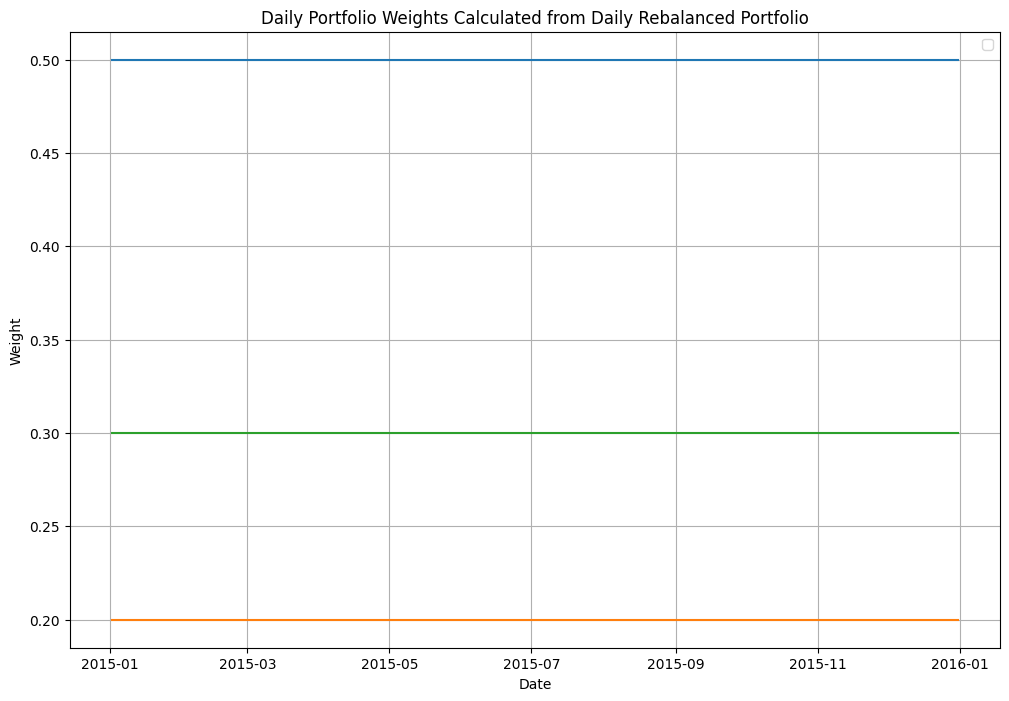

In [39]:
plot_and_format_y_axis(impliedDailyWeightsFromDailyRebalancedReturns, title='Daily Portfolio Weights Calculated from Daily Rebalanced Portfolio', ylabel='Weight')

**Question 7:** [Extra Credit: 2 points] Figure out a simpler way to implement daily rebalancing that does not use a for-loop. Calculate the gross and net return as of 12/31/2015 and verify that it matches the result from #5.

In [40]:
# initialize to the no-rebalancing case
EodNavForDailyRebal_01022015 = weightedNAV_01022015.copy()

# Calculate the daily returns by adding 1 to simple_returns
daily_returns = 1 + simple_returns_01022015

# Calculate the cumulative product of daily returns along the rows (axis=0)
cumulative_returns = daily_returns.cumprod()

# Calculate the daily rebalanced NAV by element-wise multiplication
EodNavForDailyRebal_01022015 = cumulative_returns.mul(init_weights, axis=1)

# Normalize the daily rebalanced NAV to ensure the weights sum to 1 for each day
EodNavForDailyRebal_01022015 = EodNavForDailyRebal_01022015.div(EodNavForDailyRebal_01022015.sum(axis=1), axis=0)

In [41]:
EodNavForDailyRebal_01022015.style

,AAPL,GOOG,SPY
Date,,,
2015-01-02 00:00:00,nan,nan,nan
2015-01-05 00:00:00,0.497696,0.200579,0.301725
2015-01-06 00:00:00,0.501476,0.197400,0.301124
2015-01-07 00:00:00,0.503251,0.195024,0.301725
2015-01-08 00:00:00,0.509689,0.190811,0.299500
2015-01-09 00:00:00,0.512452,0.189158,0.298391
2015-01-12 00:00:00,0.508130,0.190898,0.300972
2015-01-13 00:00:00,0.510054,0.191334,0.298611
2015-01-14 00:00:00,0.509097,0.193518,0.297385


In [42]:
EodNavForDailyRebal_01022015.iloc[-1,:]

AAPL    0.450271
GOOG    0.271251
SPY     0.278478
Name: 2015-12-31 00:00:00, dtype: float64

*We pledge on our honor that we have not given nor received any unauthorized assistance on this
assignment to/from other groups.* ***Nor have we received any assistance from prior year students.***

---
> *Amuktha Nadipelli, Hamza Siddiqui, Lekhya Mudda, Shashank Patil*

